# Assignment 5 


Question 2 

In [146]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist 
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])      

In [7]:
import time
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7274 - accuracy: 0.7605 - val_loss: 0.5315 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4907 - accuracy: 0.8291 - val_loss: 0.4699 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4449 - accuracy: 0.8455 - val_loss: 0.4591 - val_accuracy: 0.8366
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4188 - accuracy: 0.8539 - val_loss: 0.4022 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3970 - accuracy: 0.8615 - val_loss: 0.4177 - val_accuracy: 0.8504
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3812 - accuracy: 0.8682 - val_loss: 0.3797 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3671 - accuracy: 0.8717 - val_loss: 0.3954 - val_accuracy:

In [33]:
print("Wall Time:",time.time_ns(),"CPU Time:",time.process_time_ns())

Wall Time: 1680317742702168000 CPU Time: 214004955000


In [9]:
history.history

{'loss': [0.7274082899093628,
  0.4907182455062866,
  0.4448543190956116,
  0.41878649592399597,
  0.39703676104545593,
  0.38120535016059875,
  0.3670555651187897,
  0.35537898540496826,
  0.3447536528110504,
  0.33471348881721497,
  0.32611531019210815,
  0.3185426890850067,
  0.31131139397621155,
  0.30357083678245544,
  0.2969401776790619,
  0.29016461968421936,
  0.2842044532299042,
  0.27807655930519104,
  0.2736084759235382,
  0.26734912395477295,
  0.2623482048511505,
  0.25775760412216187,
  0.2528700530529022,
  0.24883036315441132,
  0.24433396756649017,
  0.23915180563926697,
  0.23549409210681915,
  0.23266804218292236,
  0.22706326842308044,
  0.22343474626541138],
 'accuracy': [0.7605454325675964,
  0.8291090726852417,
  0.8454545736312866,
  0.8538908958435059,
  0.8615454435348511,
  0.8681818246841431,
  0.8717272877693176,
  0.8737272620201111,
  0.879763662815094,
  0.8822181820869446,
  0.8839272856712341,
  0.8867636322975159,
  0.8891817927360535,
  0.89158183336

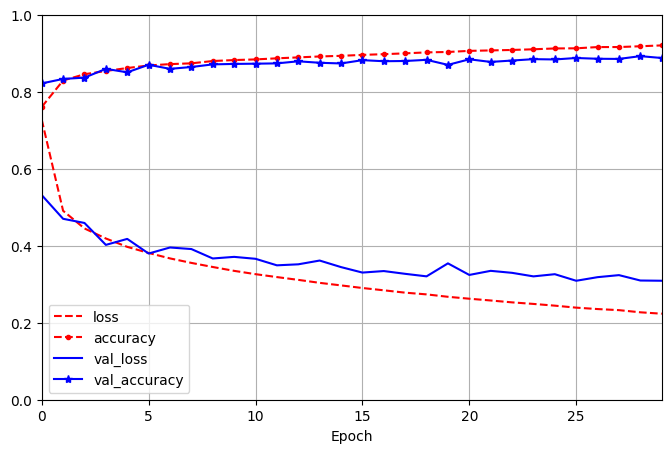

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8867


[0.32408595085144043, 0.8866999745368958]

In [82]:
X_new = X_test[:30]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 40ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.22, 0.  , 0.01, 0.  , 0.01, 0.  , 0.76, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.96, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.13, 0.  , 0.85, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.77, 0.  , 0.2 , 0.03, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.36, 0.  , 0.

In [83]:
# print(y_proba)
print(y_train)

[9 0 0 ... 9 0 2]


In [84]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 6])

In [85]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal',
       'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag',
       'T-shirt/top', 'Pullover', 'Sandal', 'Sneaker', 'Sandal',
       'Trouser', 'Pullover', 'Shirt', 'T-shirt/top', 'Ankle boot',
       'Shirt'], dtype='<U11')

In [91]:
y_new = y_test[:30]
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [92]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_new, y_pred, average=None)

(array([1.  , 1.  , 0.6 , 1.  , 1.  , 0.6 , 0.75, 1.  , 1.  , 1.  ]),
 array([1.        , 1.        , 1.        , 0.5       , 0.6       ,
        1.        , 1.        , 0.66666667, 1.        , 0.66666667]),
 array([1.        , 1.        , 0.75      , 0.66666667, 0.75      ,
        0.75      , 0.85714286, 0.8       , 1.        , 0.8       ]),
 array([2, 5, 3, 2, 5, 3, 3, 3, 1, 3]))

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_new, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       1.00      1.00      1.00         2
     Trouser       1.00      1.00      1.00         5
    Pullover       0.60      1.00      0.75         3
       Dress       1.00      0.50      0.67         2
        Coat       1.00      0.60      0.75         5
      Sandal       0.60      1.00      0.75         3
       Shirt       0.75      1.00      0.86         3
     Sneaker       1.00      0.67      0.80         3
         Bag       1.00      1.00      1.00         1
  Ankle boot       1.00      0.67      0.80         3

    accuracy                           0.83        30
   macro avg       0.89      0.84      0.84        30
weighted avg       0.90      0.83      0.83        30



# Question 3 
create a convolution neural network using the Fashion MNIST network

In [94]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
biases.shape

(32,)

In [107]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [108]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 256)        

In [109]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [110]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 459s 265ms/step - loss: 0.7076 - accuracy: 0.7583 - val_loss: 0.3574 - val_accuracy: 0.8678
Epoch 2/10
1719/1719 [==============================] - 412s 240ms/step - loss: 0.4080 - accuracy: 0.8628 - val_loss: 0.3013 - val_accuracy: 0.8872
Epoch 3/10
1719/1719 [==============================] - 424s 247ms/step - loss: 0.3454 - accuracy: 0.8839 - val_loss: 0.2912 - val_accuracy: 0.8960
Epoch 4/10
1719/1719 [==============================] - 383s 223ms/step - loss: 0.3073 - accuracy: 0.8969 - val_loss: 0.2673 - val_accuracy: 0.9052
Epoch 5/10
1719/1719 [==============================] - 393s 229ms/step - loss: 0.2858 - accuracy: 0.9033 - val_loss: 0.2790 - val_accuracy: 0.8990
Epoch 6/10
1719/1719 [==============================] - 522s 304ms/step - loss: 0.2613 - accuracy: 0.9114 - val_loss: 0.2810 - val_accuracy: 0.9016
Epoch 7/10
1719/1719 [==============================] - 1858s 1s/step - loss: 0.2525 - accuracy: 0.9144 - val_lo

In [121]:
print("Wall Time:",time.time(),"CPU Time:",time.process_time_ns())

Wall Time: 1680390567.670476 CPU Time: 15114588938000


In [111]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 30s 94ms/step - loss: 0.3306 - accuracy: 0.8989


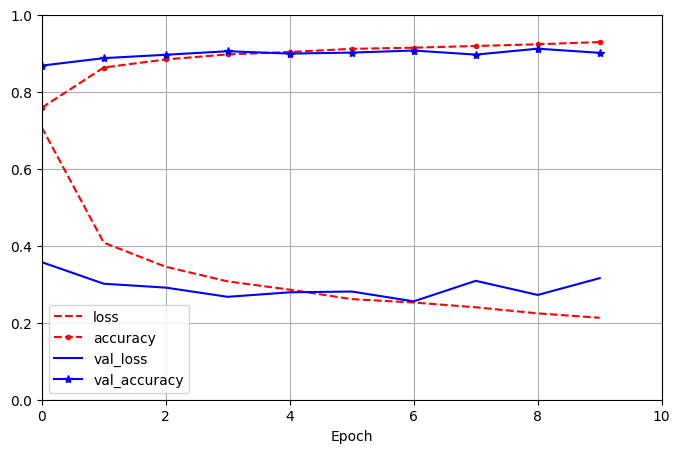

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 10], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [141]:
X_neww = X_test[:30]
y_proba2 = model.predict(X_neww)
y_proba2.round(2)

1/1 [==============================] - 0s 115ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.01, 0.  , 0.  , 0.  , 0.95, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.08, 0.  , 0.63, 0.  , 0.29, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.9 , 0.  , 0.06, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.  , 0.33, 0.  , 0.05],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.16, 0.  , 0.

In [142]:
import numpy as np
y_pred2 = y_proba2.argmax(axis=-1)
y_pred2

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5,
       7, 5, 1, 6, 4, 6, 9, 4])

In [143]:
y_neww = y_test[:30]
y_neww

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [144]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_neww, y_pred2, average=None)

(array([1. , 1. , 1. , 1. , 0.6, 0.6, 0.4, 1. , 1. , 1. ]),
 array([0.5       , 1.        , 1.        , 0.5       , 0.6       ,
        1.        , 0.66666667, 0.66666667, 1.        , 0.66666667]),
 array([0.66666667, 1.        , 1.        , 0.66666667, 0.6       ,
        0.75      , 0.5       , 0.8       , 1.        , 0.8       ]),
 array([2, 5, 3, 2, 5, 3, 3, 3, 1, 3]))

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_neww, y_pred2, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       1.00      0.50      0.67         2
     Trouser       1.00      1.00      1.00         5
    Pullover       1.00      1.00      1.00         3
       Dress       1.00      0.50      0.67         2
        Coat       0.60      0.60      0.60         5
      Sandal       0.60      1.00      0.75         3
       Shirt       0.40      0.67      0.50         3
     Sneaker       1.00      0.67      0.80         3
         Bag       1.00      1.00      1.00         1
  Ankle boot       1.00      0.67      0.80         3

    accuracy                           0.77        30
   macro avg       0.86      0.76      0.78        30
weighted avg       0.83      0.77      0.77        30

